In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
proj_hack_member = pd.read_csv('../data/hackathon_project_contributor.csv')
proj_hack_member = proj_hack_member[
    proj_hack_member["contributors"].notna() & 
    (proj_hack_member["contributors"] != "") &
    proj_hack_member["participants"].notna() & 
    (proj_hack_member["participants"] != "") 
]

def count_links(cell):
    if pd.isna(cell) or cell.strip() == "":
        return 0
    return len([x for x in cell.split(',') if x.strip() != ""])

proj_hack_member['p_count'] = proj_hack_member['participants'].apply(count_links)
proj_hack_member['c_count'] = proj_hack_member['contributors'].apply(count_links)

p_desc = proj_hack_member['p_count'].describe()
c_desc = proj_hack_member['c_count'].describe()

equal = (proj_hack_member['p_count'] == proj_hack_member['c_count']).mean()
less = (proj_hack_member['p_count'] < proj_hack_member['c_count']).mean()
greater = (proj_hack_member['p_count'] > proj_hack_member['c_count']).mean()

print("Participants Count Statistics:")
print(p_desc)
print("\nContributors Count Statistics:")
print(c_desc)

print("\nPercentage Comparison:")
print(f"p_count == c_count: {equal * 100:.2f}%")
print(f"p_count < c_count : {less * 100:.2f}%")
print(f"p_count > c_count : {greater * 100:.2f}%")


Participants Count Statistics:
count    73082.000000
mean         2.762349
std          1.549803
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         66.000000
Name: p_count, dtype: float64

Contributors Count Statistics:
count    73082.000000
mean         5.217646
std         34.254638
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       2710.000000
Name: c_count, dtype: float64

Percentage Comparison:
p_count == c_count: 41.39%
p_count < c_count : 11.81%
p_count > c_count : 46.81%


In [ ]:
all = pd.read_csv('../data/hackathons.csv')
proj_hack_member = pd.read_csv('../data/hackathon_project_contributor.csv')

proj_hack_member = proj_hack_member[
    proj_hack_member["contributors"].notna() & 
    (proj_hack_member["contributors"] != "")
]

proj_hack_member = proj_hack_member.merge(
    all[['URL', 'Location']], 
    left_on='hackathon_URL', 
    right_on='URL', 
    how='left'
)

proj_hack_member.drop(columns=['URL'], inplace=True)
proj_hack_member

,hackathon_URL,project_URL,github_links,start_date_format,end_date_format,participants,contributors,Location
0,https://supernova.devpost.com/,https://devpost.com/software/faefolk,"https://github.com/ICCards/faefolk, https://gi...",2022-05-10,2022-06-22,"https://devpost.com/RAW4RMCS, https://devpost....","https://github.com/ALLiDoizCode,https://github...",Online
1,https://supernova.devpost.com/,https://devpost.com/software/ic-map-collector,https://github.com/stumpigit/icmaps,2022-05-10,2022-06-22,https://devpost.com/stumpigit,https://github.com/stumpigit,Online
2,https://supernova.devpost.com/,https://devpost.com/software/kontribute,https://github.com/teambonsai/bonsai_dapp/blob...,2022-05-10,2022-06-22,"https://devpost.com/TsuDohNimhh, https://devpo...",https://github.com/jesssekeogh,Online
3,https://supernova.devpost.com/,https://devpost.com/software/tingram,https://github.com/tingramtingram/dfinity,2022-05-10,2022-06-22,"https://devpost.com/k-tsytsyn, https://devpost...","https://github.com/stoma655,https://github.com...",Online
4,https://supernova.devpost.com/,https://devpost.com/software/ant-kingdom,https://github.com/NFPTU/dfinity-fu,2022-05-10,2022-06-22,"https://devpost.com/damtuankhanglm1, https://d...","https://github.com/DatTNT,https://github.com/a...",Online
...,...,...,...,...,...,...,...,...
73760,https://lhd-learn-day-4.devpost.com/,https://devpost.com/software/web-scraping-hgdp3c,https://github.com/aayushibansal2001/Web-Scraping,2021-10-13,2021-10-14,"https://devpost.com/aayushibansal2001, https:/...",https://github.com/aayushibansal2001,Online
73761,https://inclutech-hack.devpost.com/,https://devpost.com/software/womentr-8e3df1,https://github.com/shametha/WoMentr,2021-12-03,2021-12-05,"https://devpost.com/19eucs130, https://devpost...",https://github.com/shametha,Online
73762,https://the-superpositron.devpost.com/,https://devpost.com/software/womentr-8e3df1,https://github.com/shametha/WoMentr,2021-08-13,2021-08-15,"https://devpost.com/19eucs130, https://devpost...",https://github.com/shametha,Online
73763,https://youthhacks-14264.devpost.com/,https://devpost.com/software/womentr-8e3df1,https://github.com/shametha/WoMentr,2021-12-17,2021-12-20,"https://devpost.com/19eucs130, https://devpost...",https://github.com/shametha,Online


In [5]:
hackathons = proj_hack_member.drop_duplicates(subset='hackathon_URL', keep='first')

hackathons

,hackathon_URL,project_URL,github_links,start_date_format,end_date_format,participants,contributors,Location
0,https://supernova.devpost.com/,https://devpost.com/software/faefolk,"https://github.com/ICCards/faefolk, https://gi...",2022-05-10,2022-06-22,"https://devpost.com/RAW4RMCS, https://devpost....","https://github.com/ALLiDoizCode,https://github...",Online
102,https://chainlinkspring2022.devpost.com/,https://devpost.com/software/vlike-a-decentral...,https://github.com/chench53/vlike,2022-04-22,2022-05-28,"https://devpost.com/RohanNero, https://devpost...","https://github.com/RohanNero,https://github.co...",Online
145,https://faberweb3.devpost.com/,https://devpost.com/software/sympodium,https://github.com/mendsalbert/sympodiumCoin,2022-02-21,2022-03-18,"https://devpost.com/AbrantepaSark, https://dev...",https://github.com/mendsalbert,Online
146,https://dw-europe-2022-hackathon.devpost.com/,https://devpost.com/software/sympodium,https://github.com/mendsalbert/sympodiumCoin,2022-04-11,2022-04-27,"https://devpost.com/AbrantepaSark, https://dev...",https://github.com/mendsalbert,Online
239,https://fintech.devpost.com/,https://devpost.com/software/qualize,https://github.com/raviavhad/qualize,2022-03-08,2022-04-10,NaN,"https://github.com/ravi-m-avhad,https://github...",Online
...,...,...,...,...,...,...,...,...
73473,https://women-in-fintech.devpost.com/,https://devpost.com/software/proud-of-pride,https://github.com/akshitagupta15june/Proud-Of...,2021-10-09,2021-10-13,"https://devpost.com/akshitagupta15june, https:...",https://github.com/akshitagupta15june,Kampala Uganda
73488,https://appsup2021.devpost.com/,https://devpost.com/software/sakhi-app,https://github.com/yashjain1974/Sakhi-App,2021-06-21,2021-09-05,https://devpost.com/yashjain1974,https://github.com/yashjain1974,Online
73541,https://webjamnyc.devpost.com/,https://devpost.com/software/todo-app-sk21gt,https://github.com/abhishek213-alb/TODO-APP,2021-11-05,2021-11-06,https://devpost.com/a3152158,https://github.com/abhishek213-alb,To Be Determined (in New York)
73606,https://anhnguyenhackathon123.devpost.com/,https://devpost.com/software/equilo,https://github.com/AHAAkumbom/equilo_app,2021-09-28,2021-09-30,"https://devpost.com/Akumbom, https://devpost.c...","https://github.com/AHAAkumbom,https://github.c...",thailan


In [6]:
def extract_year(value):
    try:
        return pd.to_datetime(value, errors='coerce').year
    except:
        return None

hackathons['year'] = hackathons['start_date_format'].apply(extract_year)

year_counts = hackathons['year'].value_counts().sort_index()
total = year_counts.sum()

year_df = pd.DataFrame({
    'year': year_counts.index,
    'count': year_counts.values,
})
year_df['percentage'] = (year_df['count'] / total * 100).round(2)


print(year_df)



    year  count  percentage
0   2010      1        0.02
1   2012      1        0.02
2   2013     32        0.65
3   2014    123        2.50
4   2015    343        6.97
5   2016    473        9.61
6   2017    525       10.67
7   2018    554       11.26
8   2019    605       12.29
9   2020    791       16.07
10  2021    983       19.98
11  2022    490        9.96


C:\Windows\Temp\ipykernel_7016\597689057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['year'] = hackathons['start_date_format'].apply(extract_year)


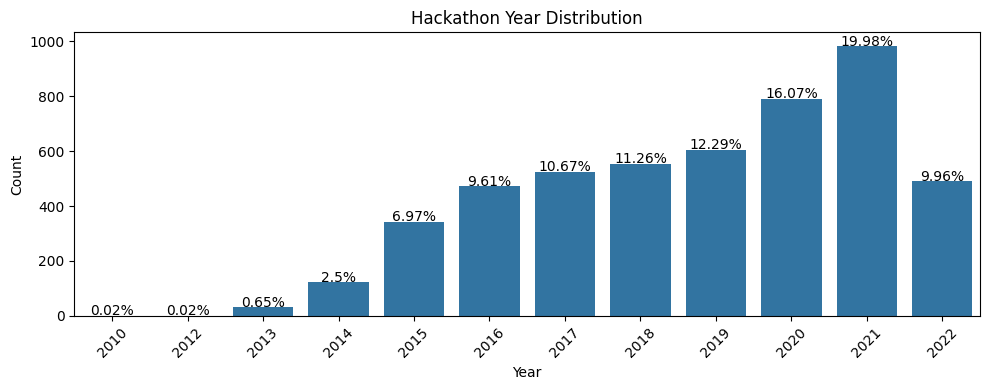

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='year', y='count', data=year_df)

for i, row in year_df.iterrows():
    plt.text(i, row['count'] + 1, f"{row['percentage']}%", ha='center')

plt.title("Hackathon Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
def assign_period(year):
    if 2010 <= year <= 2014:
        return '2010-2014'
    elif 2015 <= year <= 2018:
        return '2015-2018'
    elif 2019 <= year <= 2022:
        return '2019-2022'
    else:
        return 'Other'

hackathons_clean = hackathons[hackathons['year'].notna()].copy()
hackathons_clean['year'] = hackathons_clean['year'].astype(int)

hackathons_clean['period'] = hackathons_clean['year'].apply(assign_period)

period_counts = hackathons_clean['period'].value_counts().sort_index()
total = period_counts.sum()

period_df = pd.DataFrame({
    'period': period_counts.index,
    'count': period_counts.values,
})
period_df['percentage'] = (period_df['count'] / total * 100).round(2)

print(period_df)


      period  count  percentage
0  2010-2014    157        3.19
1  2015-2018   1895       38.51
2  2019-2022   2869       58.30


C:\Windows\Temp\ipykernel_7016\1472668486.py:8: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7016\1472668486.py:8: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7016\1472668486.py:8: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7016\1472668486.py:8: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7016\1472668486.py:8: UserWarning: Glyph 20030 (\N{CJK UNIFIED IDEOGRAPH-4E3E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_7016\1472668486.py:8: UserWarning: Glyph 21150 (\N{CJK UNIFIED IDEOGRAPH-529E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\hackathon\hackathon\.venv\Lib\s

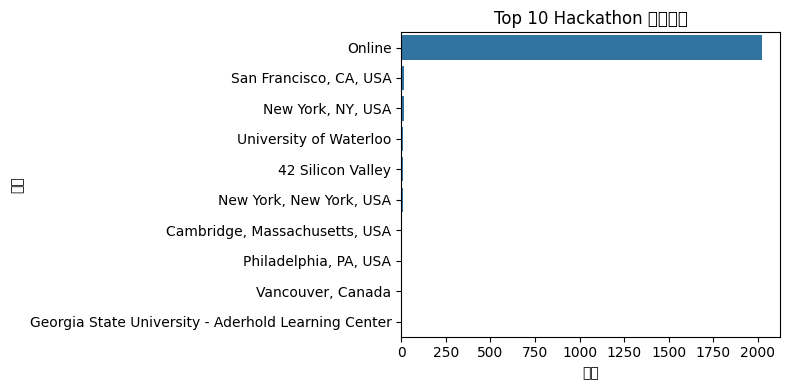

In [ ]:
top_locations = hackathons['Location'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(y=top_locations.index, x=top_locations.values)
plt.title("Top 10 Hackathon Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

In [10]:
missing_location_count = hackathons['Location'].isna().sum()
print(f"Number of rows with missing Location: {missing_location_count}")

all_count = hackathons['Location'].value_counts()
print(all_count)

online_count = hackathons[hackathons['Location'] == 'Online'].shape[0]
total_count = hackathons.shape[0]
online_percentage = (online_count / total_count) * 100
print(f"Percentage of 'Online' in Location: {online_percentage:.2f}%")


Number of rows with missing Location: 68
Location
Online                                     2023
San Francisco, CA, USA                       17
New York, NY, USA                            16
University of Waterloo                       10
42 Silicon Valley                             9
                                           ... 
Computer Science & Engineering Building       1
esi Algiers-Wed el semar                      1
Texas Tech University - Innovation Hub        1
U of Penn                                     1
The Ion                                       1
Name: count, Length: 2246, dtype: int64
Percentage of 'Online' in Location: 41.11%


Descriptive statistics of duration (in days):


C:\Windows\Temp\ipykernel_7016\1835446194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'], format="%Y-%m-%d", errors='coerce')
C:\Windows\Temp\ipykernel_7016\1835446194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'], format="%Y-%m-%d", errors='coerce')
C:\Windows\Temp\ipykernel_7016\1835446194.py:3: SettingWithCopyWarning: 
A value is trying t

count    4921.000000
mean        7.901849
std        20.614333
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       403.000000
Name: duration_days, dtype: float64


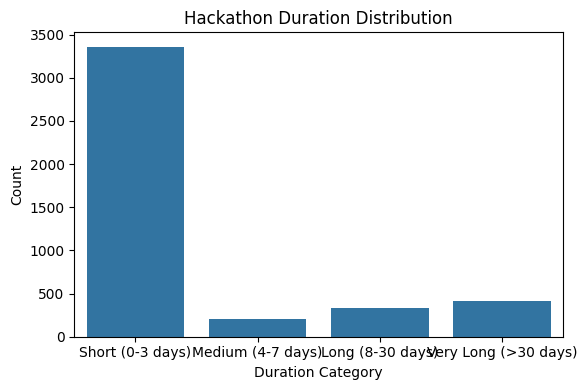

In [11]:
hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'], format="%Y-%m-%d", errors='coerce')
hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'], format="%Y-%m-%d", errors='coerce')
hackathons['duration_days'] = (hackathons['end_date_format'] - hackathons['start_date_format']).dt.days
# Basic descriptive statistics
print("Descriptive statistics of duration (in days):")
print(hackathons['duration_days'].describe())

# Define duration bins: 0–3 days, 4–7 days, 8–30 days, over 30 days
bins = [0, 3, 7, 30, 9999]
labels = ['Short (0-3 days)', 'Medium (4-7 days)', 'Long (8-30 days)', 'Very Long (>30 days)']
hackathons['duration_category'] = pd.cut(hackathons['duration_days'], bins=bins, labels=labels, right=True)

# Plot distribution of duration categories
plt.figure(figsize=(6, 4))
duration_dist = hackathons['duration_category'].value_counts().sort_index()
sns.barplot(x=duration_dist.index, y=duration_dist.values)
plt.title("Hackathon Duration Distribution")
plt.xlabel("Duration Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
